In [49]:
print("EXIT TEST-Alok")

EXIT TEST-Alok



Imagine you're a data scientist working for a national health agency tasked with addressing a growing public health concern: obesity. The nation is witnessing a rapid increase in obesity-related health issues, and your team has been given the responsibility to predict and identify individuals at risk based on lifestyle and demographic data.

Your task is to analyze the dataset provided, which contains information on people's eating habits, physical activity levels, family history, and other lifestyle factors. The goal is to develop a predictive model that can accurately classify individuals into various obesity categories (e.g., normal weight, overweight, obesity levels I, II, or III).

The stakes are high. Accurate predictions could lead to targeted interventions and public health campaigns that may significantly reduce the incidence of obesity-related diseases in the population. However, inaccurate predictions might misallocate resources or fail to help those most at risk.


# **DATA AND LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/content/Obesity.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# **EYEBALLING**

In [4]:
data.shape

(2111, 17)

In [5]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [7]:
data.isna().sum()

,0
Gender,9
Age,0
Height,10
Weight,0
family_history_with_overweight,6
FAVC,0
FCVC,0
NCP,0
CAEC,9
SMOKE,0


# **MISSING AND DUPLICATE VALUE HANDLING**

In [8]:
#Handling missing values
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['family_history_with_overweight']=data['family_history_with_overweight'].fillna(data['family_history_with_overweight'].mode()[0])
data['CAEC']=data['CAEC'].fillna(data['CAEC'].mode()[0])
data['SCC']=data['SCC'].fillna(data['SCC'].mode()[0])
data['MTRANS']=data['MTRANS'].fillna(data['MTRANS'].mode()[0])
data['Height']=data['Height'].fillna(data['Height'].median())



In [9]:
data.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [10]:
data.duplicated().sum()

23

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

# **OUTLIER HANDLING**

In [13]:
for i in data.columns:
  print(data[i].value_counts())

Gender
Male      1055
Female    1033
Name: count, dtype: int64
Age
18.000000    125
26.000000    101
23.000000     88
21.000000     77
19.000000     59
            ... 
18.549437      1
36.310292      1
33.270448      1
33.081600      1
23.664709      1
Name: count, Length: 1406, dtype: int64
Height
1.700000    59
1.650000    49
1.600000    42
1.750000    39
1.800000    28
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64
Weight
80.000000     59
50.000000     42
75.000000     39
60.000000     37
70.000000     30
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64
family_history_with_overweight
yes    1724
no      364
Name: count, dtype: int64
FAVC
yes    1845
no      243
Name: count, dtype: int64
FCVC
3.000000    647
2.000000    582
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.70613

In [14]:
#numeric columns
num_col=data.select_dtypes(include=np.number).columns
num_col

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [15]:
#categoric columns
cat_col=data.select_dtypes(exclude=np.number).columns
cat_col

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

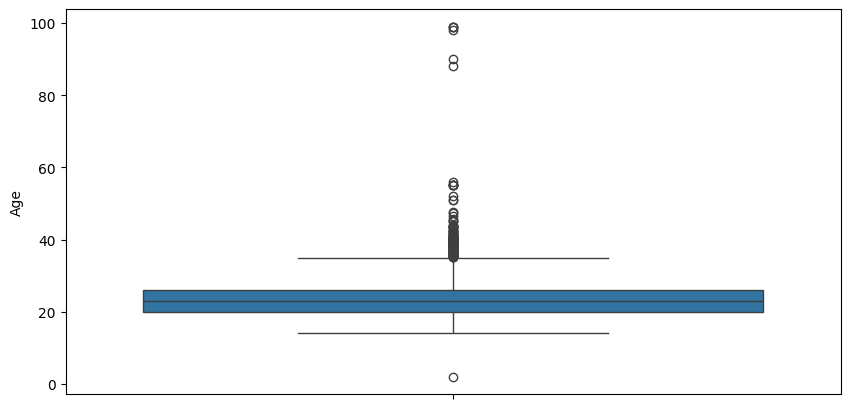

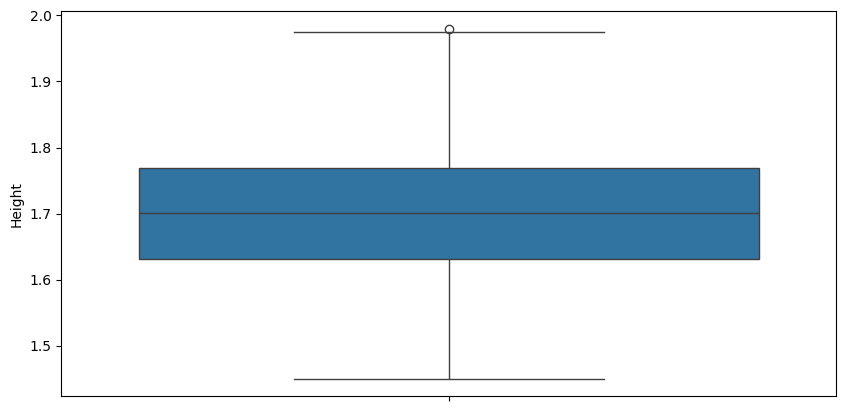

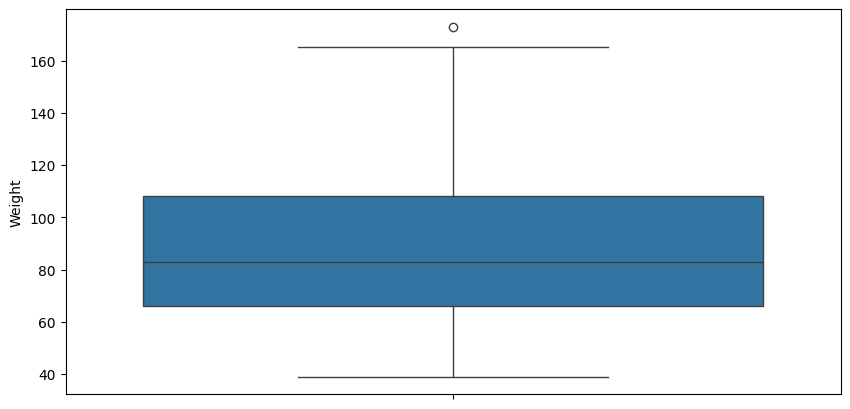

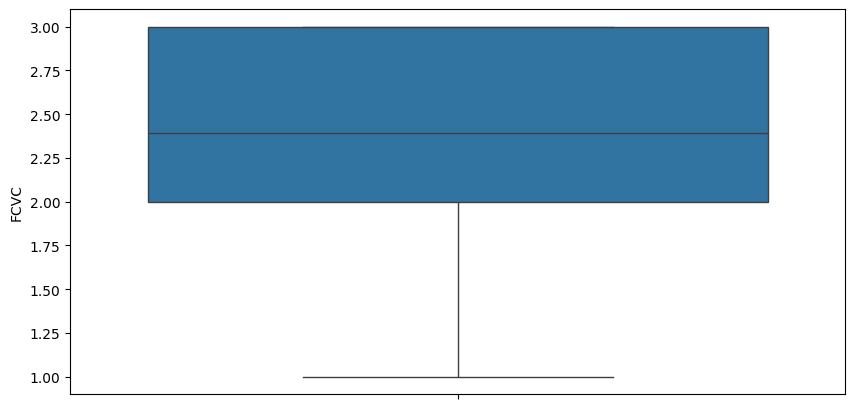

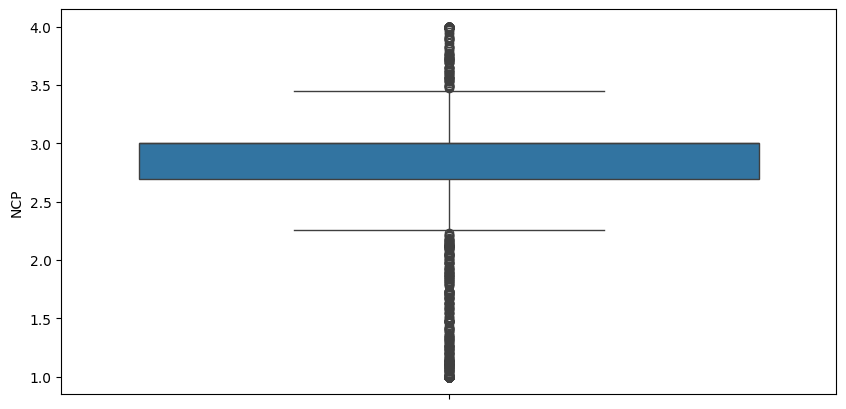

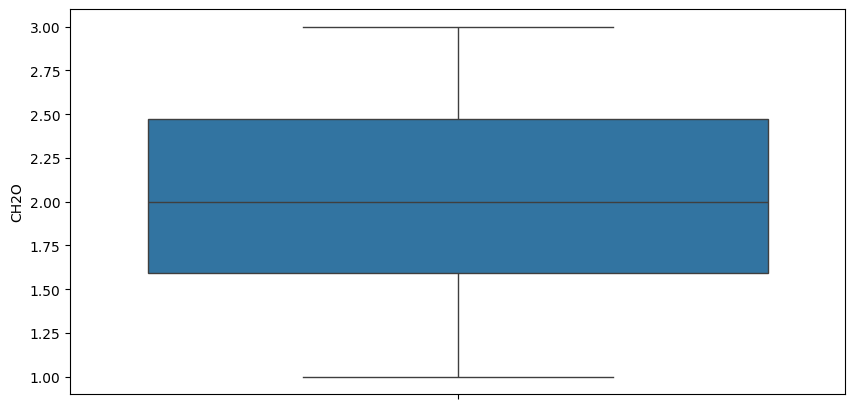

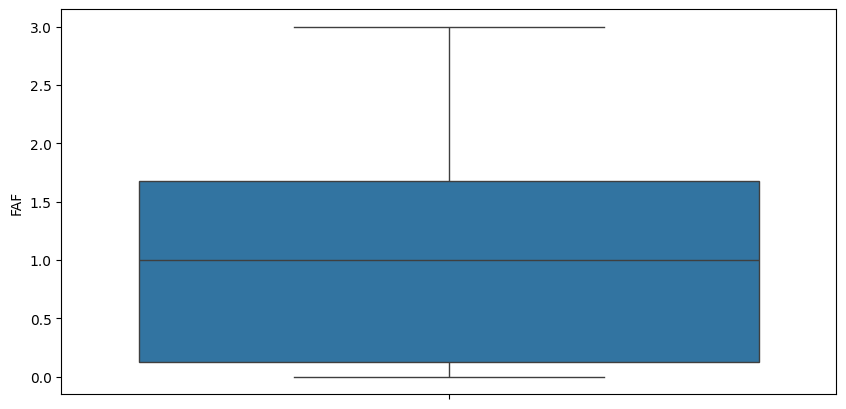

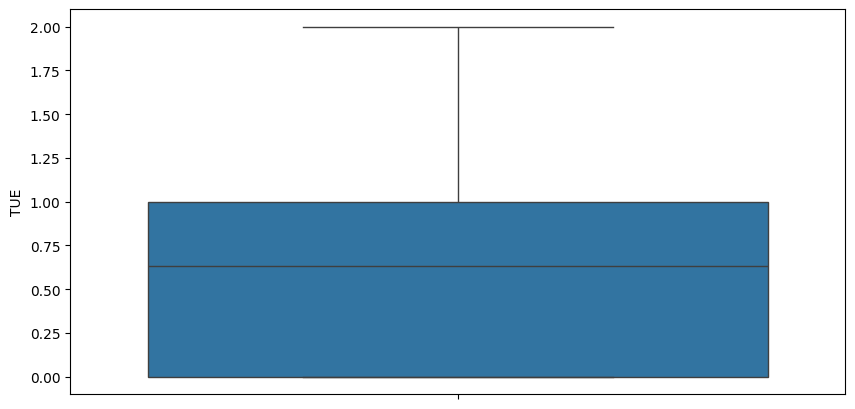

In [16]:
#boxplot for numeric col
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[i])
  plt.show()

ONly Age and NCp show possible outlier presence

In [17]:
data['Age'].describe()

,Age
count,2088.000000
mean,24.529166
std,7.393553
min,2.000000
25%,19.918283
50%,22.851747
75%,26.000000
max,99.000000


In [18]:
#we will clip age between 10 and 90
lower=10
upper=90
data['Age']=np.where(data['Age']<lower,lower,data['Age'])
data['Age']=np.where(data['Age']>upper,upper,data['Age'])

In [19]:
data['Age'].describe()

,Age
count,2088.000000
mean,24.516235
std,7.223528
min,10.000000
25%,19.918283
50%,22.851747
75%,26.000000
max,90.000000


In [20]:
data['NCP'].describe()

,NCP
count,2088.000000
mean,2.700364
std,0.765337
min,1.000000
25%,2.695887
50%,3.000000
75%,3.000000
max,4.000000


Clipping may not be needed here.

# **EDA**

<Axes: >

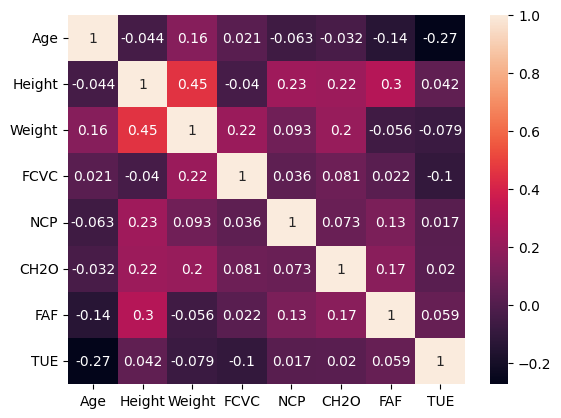

In [21]:
sns.heatmap(data[num_col].corr(),annot=True)

<Axes: xlabel='NObeyesdad'>

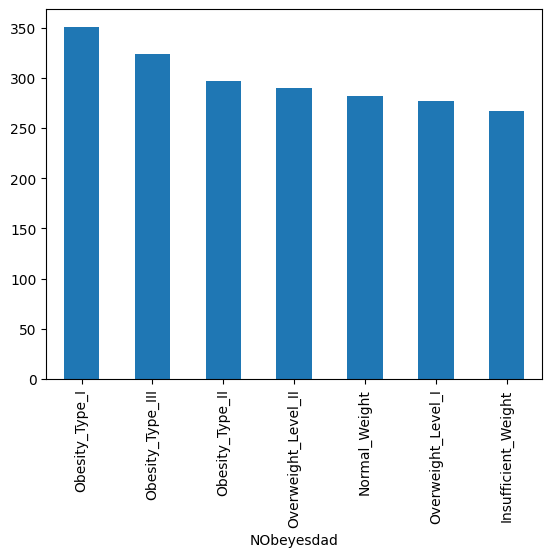

In [22]:
data['NObeyesdad'].value_counts().plot(kind='bar')


Each type has been represented enought. Even though some class imbalance exists.

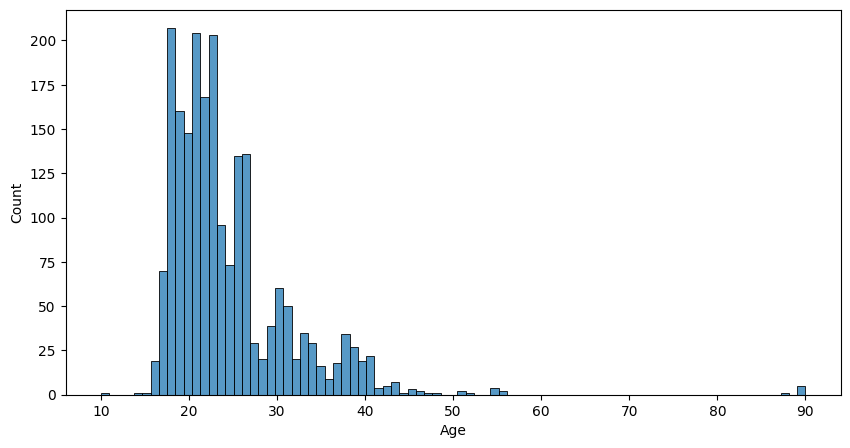

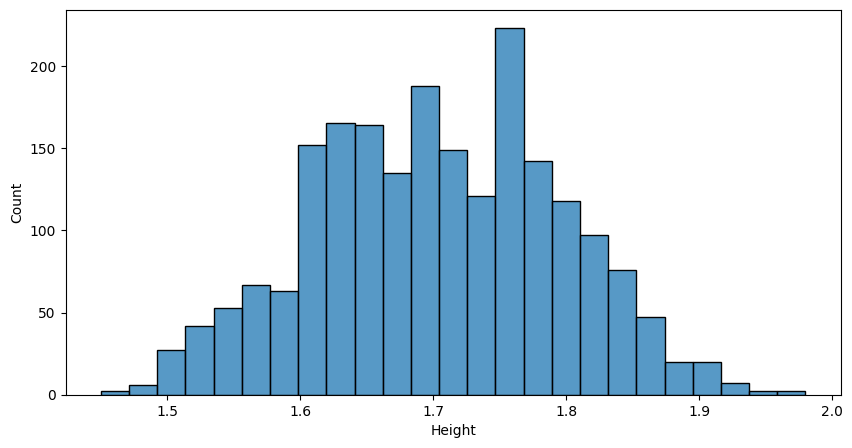

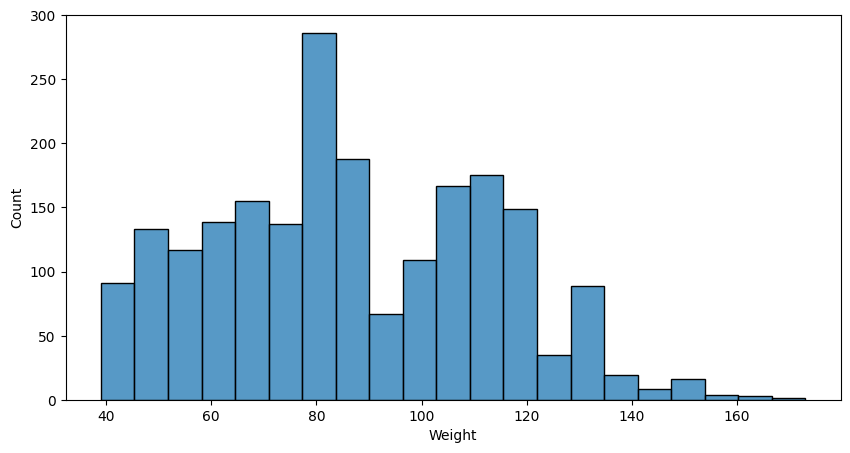

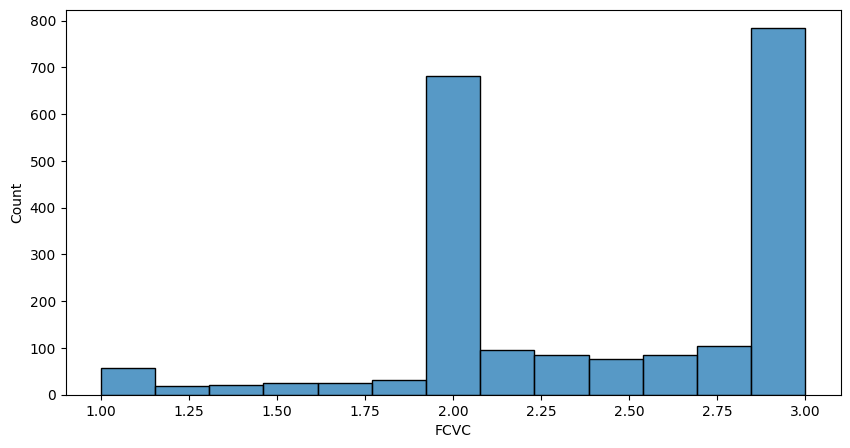

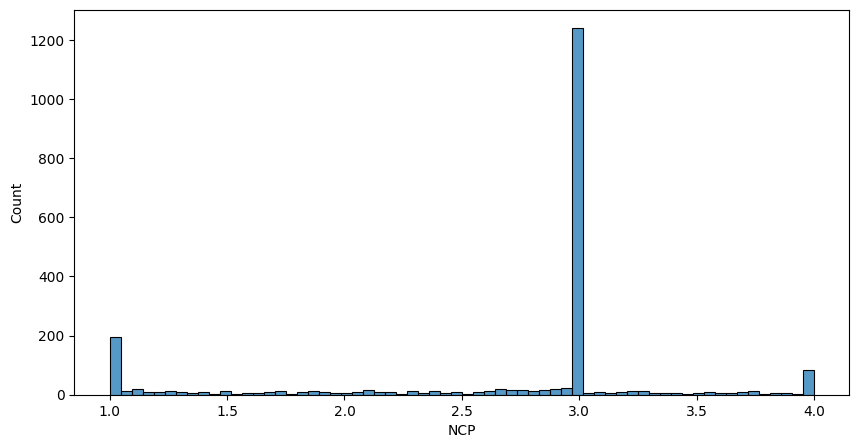

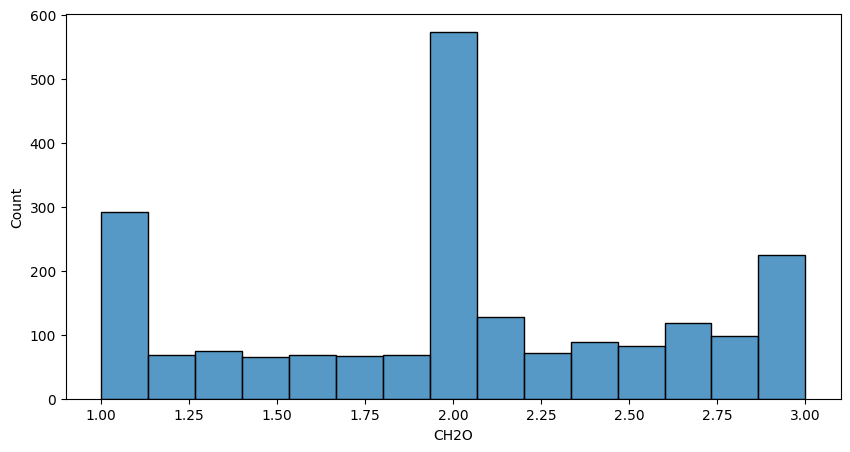

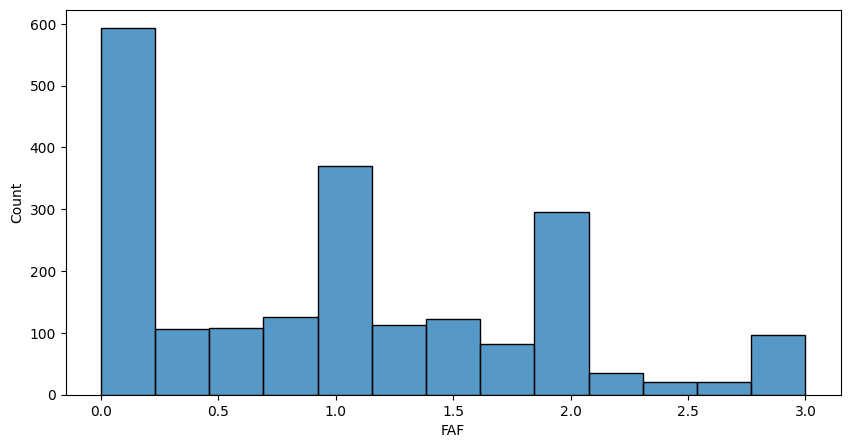

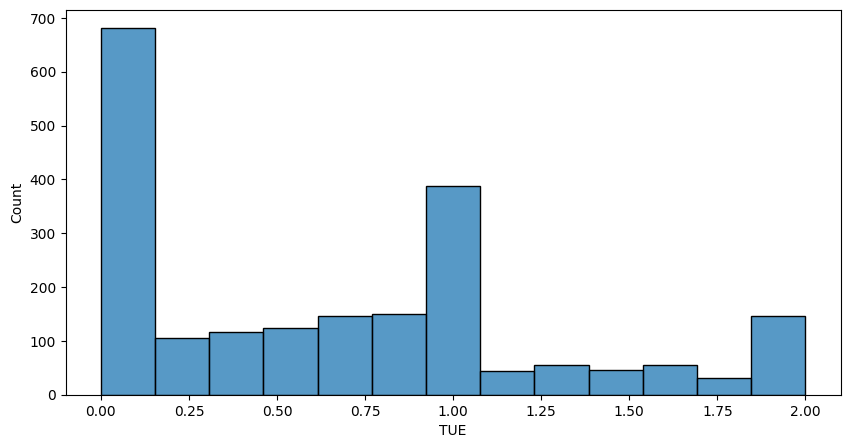

In [23]:
#plot for num columns
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.histplot(data[i])
  plt.show()

In [24]:
cat_col

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

<Axes: xlabel='FAVC', ylabel='count'>

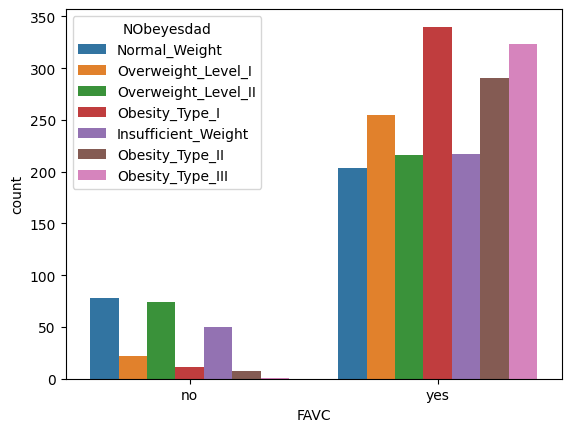

In [25]:
sns.countplot(x='FAVC', hue='NObeyesdad', data=data)

We se  a direct relationship. when a person consumes high calory food, chances of obesity is higher.

<Axes: xlabel='CAEC', ylabel='count'>

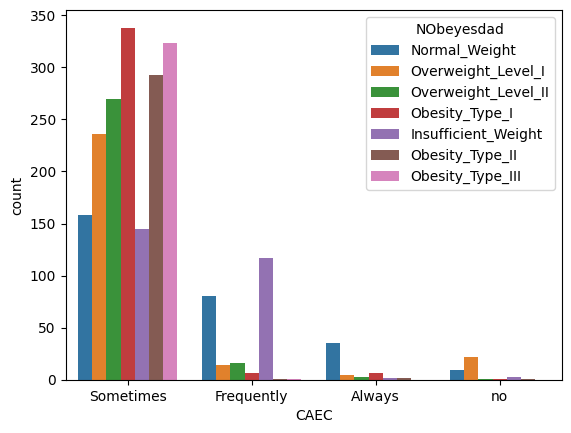

In [26]:
sns.countplot(x='CAEC', hue='NObeyesdad', data=data)

<Axes: xlabel='CALC', ylabel='count'>

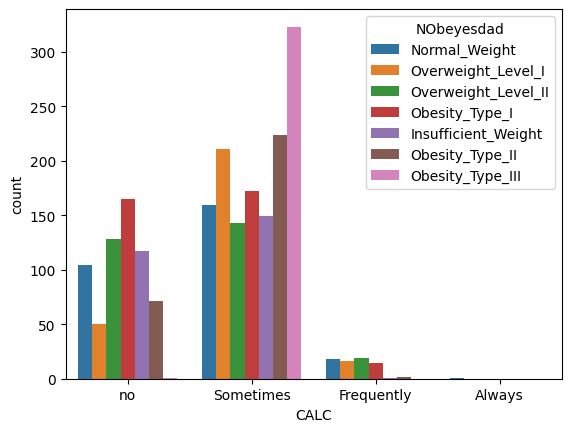

In [27]:
sns.countplot(x='CALC', hue='NObeyesdad', data=data)

<Axes: xlabel='MTRANS', ylabel='count'>

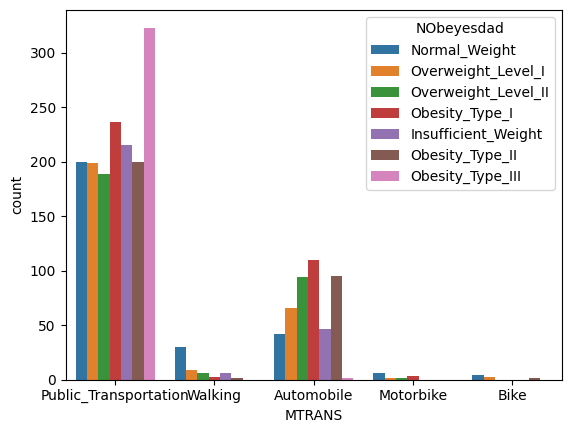

In [28]:
sns.countplot(x='MTRANS', hue='NObeyesdad', data=data)

<Axes: xlabel='Gender', ylabel='count'>

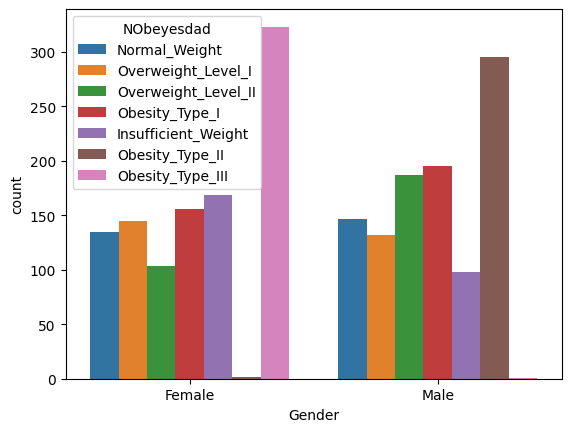

In [29]:
sns.countplot(x='Gender', hue='NObeyesdad', data=data)

Type 3 is prevalent in females and Type 2 is more in males

# **ENCODING**

In [30]:
cat_col

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [31]:
for i in cat_col:
  print(data[i].value_counts())

Gender
Male      1055
Female    1033
Name: count, dtype: int64
family_history_with_overweight
yes    1724
no      364
Name: count, dtype: int64
FAVC
yes    1845
no      243
Name: count, dtype: int64
CAEC
Sometimes     1763
Frequently     235
Always          53
no              37
Name: count, dtype: int64
SMOKE
no     2044
yes      44
Name: count, dtype: int64
SCC
no     1992
yes      96
Name: count, dtype: int64
CALC
Sometimes     1381
no             636
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1562
Automobile                454
Walking                    54
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     277
Insufficient_Weight    267
Name: count, dtype: int64


In [32]:
data['Gender']=data['Gender'].map({'Female':0,'Male':1})
data['family_history_with_overweight']=data['family_history_with_overweight'].map({'no':0,'yes':1})
data['FAVC']=data['FAVC'].map({'no':0,'yes':1})
data['SMOKE']=data['SMOKE'].map({'no':0,'yes':1})
data['SCC']=data['SCC'].map({'no':0,'yes':1})
data['CAEC']=data['CAEC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})
data['CALC']=data['CALC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})
data['MTRANS']=data['MTRANS'].map({'Walking':0,'Public_Transportation':1,'Automobile':2,'Motorbike':3,'Bike':4})
data['NObeyesdad']=data['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2088 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2088 non-null   int64  
 1   Age                             2088 non-null   float64
 2   Height                          2088 non-null   float64
 3   Weight                          2088 non-null   float64
 4   family_history_with_overweight  2088 non-null   int64  
 5   FAVC                            2088 non-null   int64  
 6   FCVC                            2088 non-null   float64
 7   NCP                             2088 non-null   float64
 8   CAEC                            2088 non-null   int64  
 9   SMOKE                           2088 non-null   int64  
 10  CH2O                            2088 non-null   float64
 11  SCC                             2088 non-null   int64  
 12  FAF                             2088 no

In [34]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


In [35]:
data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,0.505268,24.516235,1.702952,86.850656,0.825670,0.883621,2.421264,2.700364,1.145594,0.021073,2.005226,0.045977,1.012806,0.662718,0.729885,1.212165,3.131705
std,0.500092,7.223528,0.092937,26.187171,0.379483,0.320756,0.534688,0.765337,0.459025,0.143661,0.608529,0.209485,0.853270,0.608181,0.516918,0.499646,1.985426
min,0.000000,10.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.918283,1.630878,66.000000,1.000000,1.000000,2.000000,2.695887,1.000000,0.000000,1.591173,0.000000,0.125965,0.000000,0.000000,1.000000,1.000000
50%,1.000000,22.851747,1.701490,83.059034,1.000000,1.000000,2.395051,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.630866,1.000000,1.000000,3.000000
75%,1.000000,26.000000,1.769488,108.014255,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.469860,0.000000,1.677185,1.000000,1.000000,1.000000,5.000000
max,1.000000,90.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


# **MODELLING**

In [36]:
from sklearn.model_selection import train_test_split
y=data['NObeyesdad']
x=data.drop('NObeyesdad',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1670, 16), (418, 16), (1670,), (418,))

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [38]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.937799043062201
[[54  4  0  0  0  0  0]
 [ 2 54  5  0  0  0  0]
 [ 0  7 44  0  0  0  0]
 [ 0  3  1 48  1  0  0]
 [ 0  0  0  2 60  0  0]
 [ 0  0  0  0  1 61  0]
 [ 0  0  0  0  0  0 71]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.79      0.89      0.84        61
           2       0.88      0.86      0.87        51
           3       0.96      0.91      0.93        53
           4       0.97      0.97      0.97        62
           5       1.00      0.98      0.99        62
           6       1.00      1.00      1.00        71

    accuracy                           0.94       418
   macro avg       0.94      0.93      0.94       418
weighted avg       0.94      0.94      0.94       418



Checking for overfitting

In [39]:
y_train_pred = model.predict(x_train)
print("Accuracy (Train):", accuracy_score(y_train, y_train_pred))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))

Accuracy (Train): 1.0

Confusion Matrix (Train):
 [[209   0   0   0   0   0   0]
 [  0 221   0   0   0   0   0]
 [  0   0 226   0   0   0   0]
 [  0   0   0 237   0   0   0]
 [  0   0   0   0 289   0   0]
 [  0   0   0   0   0 235   0]
 [  0   0   0   0   0   0 253]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00       226
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       289
           5       1.00      1.00      1.00       235
           6       1.00      1.00      1.00       253

    accuracy                           1.00      1670
   macro avg       1.00      1.00      1.00      1670
weighted avg       1.00      1.00      1.00      1670



Train data fully learned. slight deviation in test data. perform tuning to improve

# **HYPERPARAMETER TUNING**

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [41]:
model_tuned = RandomForestClassifier(random_state=42, **grid_search.best_params_)
model_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [42]:
y_pred_tuned = model_tuned.predict(x_test)
print("Accuracy (Tuned):", accuracy_score(y_test, y_pred_tuned))
print("\nConfusion Matrix (Tuned):\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))


Accuracy (Tuned): 0.9425837320574163

Confusion Matrix (Tuned):
 [[54  4  0  0  0  0  0]
 [ 2 55  3  1  0  0  0]
 [ 0  7 44  0  0  0  0]
 [ 0  4  1 48  0  0  0]
 [ 0  0  0  1 61  0  0]
 [ 0  0  0  0  1 61  0]
 [ 0  0  0  0  0  0 71]]

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.79      0.90      0.84        61
           2       0.92      0.86      0.89        51
           3       0.96      0.91      0.93        53
           4       0.98      0.98      0.98        62
           5       1.00      0.98      0.99        62
           6       1.00      1.00      1.00        71

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.94       418



Slight improvements in f1 scores of classes 2 and 4

# **TEST**

In [45]:
x_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
539,0,18.540535,1.564568,41.397378,0,1,2.658112,1.000000,1,0,1.298165,0,0.000000,1.639326,1,1
1478,1,19.515324,1.879144,112.932984,1,1,2.000000,2.152733,1,0,2.533690,0,0.917563,1.285838,1,1
388,1,18.000000,1.780000,108.000000,1,0,2.000000,3.000000,1,0,3.000000,0,1.000000,0.000000,0,1
595,1,17.210933,1.819557,58.325122,1,1,2.559600,4.000000,1,0,2.000000,0,2.000000,0.331483,0,2
1887,0,25.967730,1.603404,105.031908,1,1,3.000000,3.000000,1,0,1.919473,0,0.027101,0.546137,1,1


In [48]:
#checking for a test case 1887
new_test_case = pd.DataFrame({
    'Gender': [0],
    'Age': [25.9],
    'Height': [1.60],
    'Weight': [105],
    'family_history_with_overweight': [1],
    'FAVC': [1],
    'FCVC': [3],
    'NCP': [3],
    'CAEC': [1],
    'SMOKE': [0],
    'CH2O': [1.9],
    'SCC': [0],
    'FAF': [0.02],
    'TUE': [0.5],
    'CALC': [1],
    'MTRANS': [1]
})

# Predict the class for the new test case
predicted_class = model_tuned.predict(new_test_case)
print(f'Predicted class: {predicted_class[0]}')

# If you want the class label names
class_labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted class label: {predicted_label}')


Predicted class: 6
Predicted class label: Obesity_Type_III


In [46]:
y_test.head()

,NObeyesdad
539,0
1478,4
388,4
595,0
1887,6


The model works to predict and classify obesity/weight categories